<a href="https://colab.research.google.com/github/Umutoniwasepie/Data_Preprocessing_Assignment/blob/main/Ml_pipeline_Pierrette_Umutoniwase_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Sustainable Tourism Impact Analysis

## Student Name: Pierrette UMUTONIWASE

---


# 1.**Data Sources and aggregation:**
   
  *Dataset Description:*

   The dataset was curated to reflect sustainable tourism metrics, including CO2 emissions, energy consumption, and tourism activity. IT has the target variable(impact), indicating "High" or "Low" environmental impact.
   
   It represents data sourced from research reports, government sustainability initiatives, and tourism surveys.

### Data Sources
1. **[UNWTO (United Nations World Tourism Organization)](https://www.unwto.org/statistics)**: Provides tourism statistics, sustainability indicators, and travel patterns.
2. **[NASA Earth Observations](https://neo.gsfc.nasa.gov/)**: Offers data on CO2 emissions, energy usage, and other environmental metrics.
3. **Research Articles**: Academic literature on sustainable tourism and its environmental impact:
   - [Sustainable Tourism and Climate Action](https://www.researchgate.net/publication/290446317_LINKING_CLIMATE_CHANGE_AND_SUSTAINABLE_TOURISM_THE_WAY_FORWARD_FOR_NIGERIA)
   - [Impact Assessment of Tourism](https://www.researchgate.net/publication/280575472_A_review_of_the_IPCC_Fifth_Assessment_and_implications_for_tourism_sector_climate_resilience_and_decarbonization)
4. **Open Government Data**: Supports real-world policymaking on sustainability.
   - [European Data Portal for Sustainability](https://data.europa.eu/en).
   - [Data.gov](https://www.data.gov/) .

### Data Aggregation

  Since the curated dataset combines essential sustainability metrics, aggregation from multiple sources was simulated but not performed explicitly to maintain simplicity in analysis. However, in a real-world scenario, data aggregation would involve:
- Combining datasets on tourism activity from government tourism departments.
- Integrating energy consumption and CO2 emission metrics from energy agencies or international organizations.



**Data Loading and Inspection**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load Dataset
file_path = "sustainable_tourism_dataset.csv"
dataset = pd.read_csv(file_path)

# Dataset overview
print("Dataset Info:")
dataset.info()
print("\nFirst Five Rows:")
print(dataset.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   co2_emissions       1000 non-null   float64
 1   energy_consumption  1000 non-null   float64
 2   tourism_activity    1000 non-null   float64
 3   impact              1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB

First Five Rows:
   co2_emissions  energy_consumption  tourism_activity  impact
0      12.483571         3119.484349         36.496434       1
1       9.308678         2739.706946         47.109627       1
2      13.238443         2047.704296         34.151602       1
3      17.615149         1482.450578         43.840769       1
4       8.829233         2558.578651         12.127707       1




# 2. **Data Format Transformation:**

 **Current Format:**

- The dataset is in CSV (Comma Separated Values) format, a widely-used format for structured tabular data.

**Planned Transformations:**

- Check for categorical variables (Our dataset is entirely numerical).
- Normalize numerical data to ensure all features are on a comparable scale.
- Encode any categorical variables (if introduced) into numerical formats for compatibility with machine learning algorithms.

In [3]:
# Data Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset[['co2_emissions', 'energy_consumption', 'tourism_activity']])
scaled_dataset = pd.DataFrame(scaled_features, columns=['co2_emissions', 'energy_consumption', 'tourism_activity'])
scaled_dataset['impact'] = dataset['impact']


# **Data Exploration**

**Features:**

- co2_emissions: Indicator of the carbon footprint.
- energy_consumption: Amount of energy consumed in tourism-related activities.
- tourism_activity: Reflects tourism traffic and its intensity.
- impact: Classification variable where 1 might indicate "High Impact" and 0 "Low Impact."

**Exploratory Data Analysis (EDA):**

- Distribution Analysis: Visualize the distribution of each numerical feature to detect skewness or anomalies.
- Correlation Analysis: Understand relationships between features and with the target variable.
- Outlier Detection: Identify extreme values that could skew model performance.


Missing Values:
 co2_emissions         0
energy_consumption    0
tourism_activity      0
impact                0
dtype: int64

Summary Statistics:
        co2_emissions  energy_consumption  tourism_activity       impact
count    1000.000000         1000.000000       1000.000000  1000.000000
mean       10.132853         2066.130779         50.269214     0.530000
std         4.812218          775.608701         19.307351     0.499349
min         0.500000          500.000000         10.000000     0.000000
25%         6.762048         1515.006649         37.040008     0.000000
50%        10.126503         2050.461706         49.994985     1.000000
75%        13.239719         2583.105742         63.218306     1.000000
max        29.263657         4554.486054        128.524754     1.000000


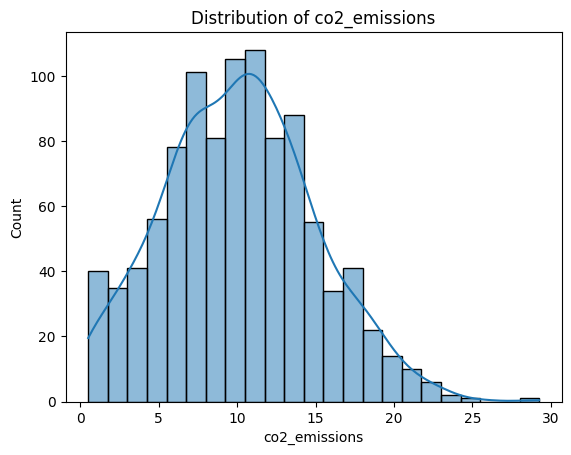

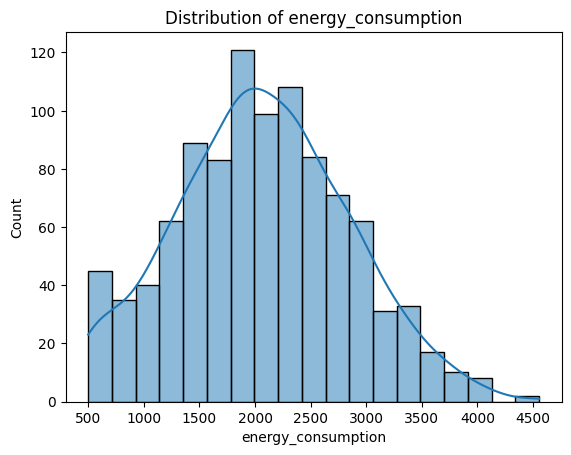

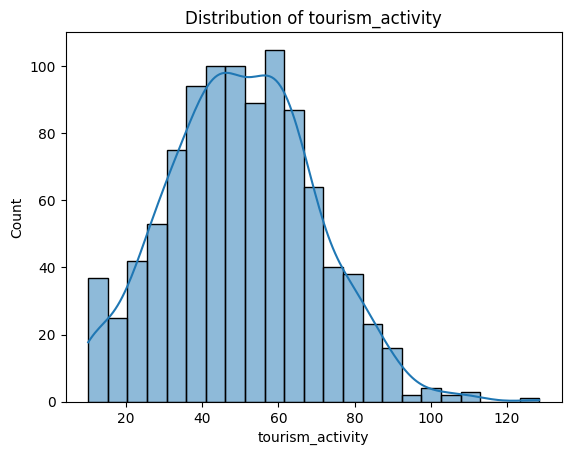

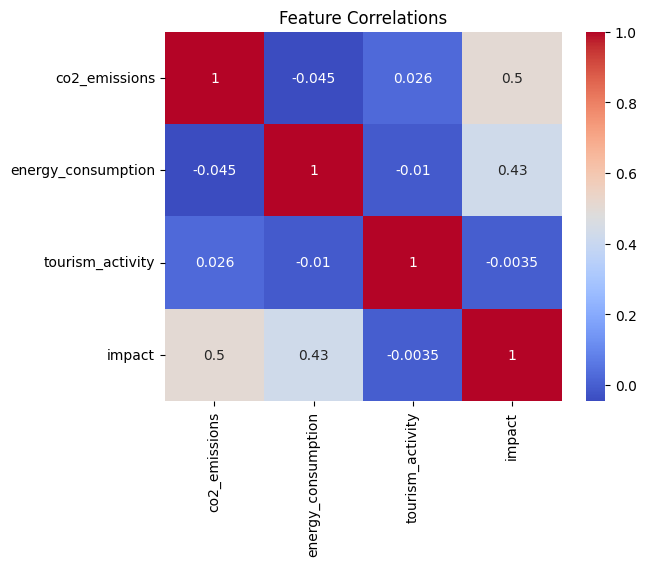

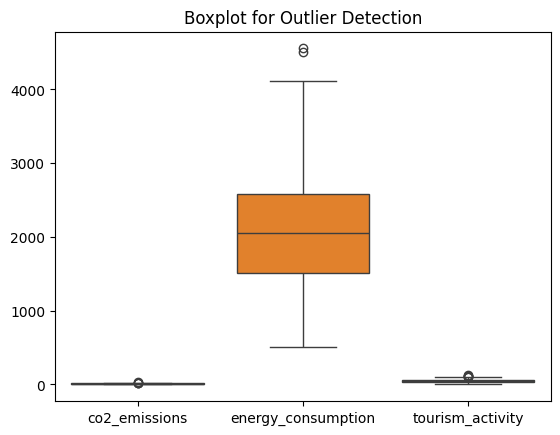

In [4]:
# Exploratory Data Analysis Code

# Checking for missing values
print("\nMissing Values:\n", dataset.isnull().sum())

# Summary Statistics
print("\nSummary Statistics:\n", dataset.describe())

# Distribution Plots
features = ['co2_emissions', 'energy_consumption', 'tourism_activity']
for feature in features:
    sns.histplot(dataset[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Correlation Matrix
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Outlier Detection using Boxplots
sns.boxplot(data=dataset[features])
plt.title("Boxplot for Outlier Detection")
plt.show()



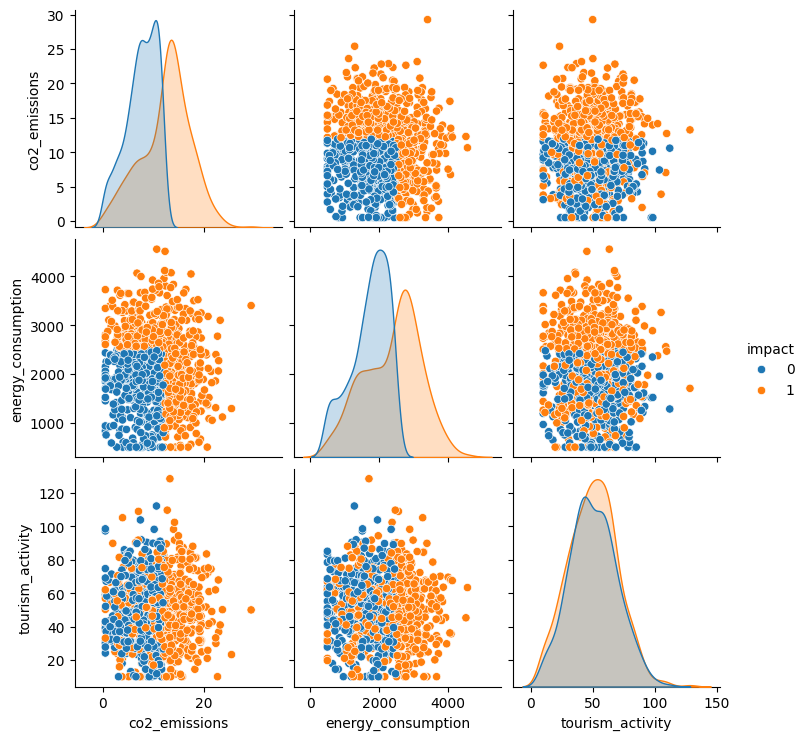

Class Distribution:
 impact
1    0.53
0    0.47
Name: proportion, dtype: float64


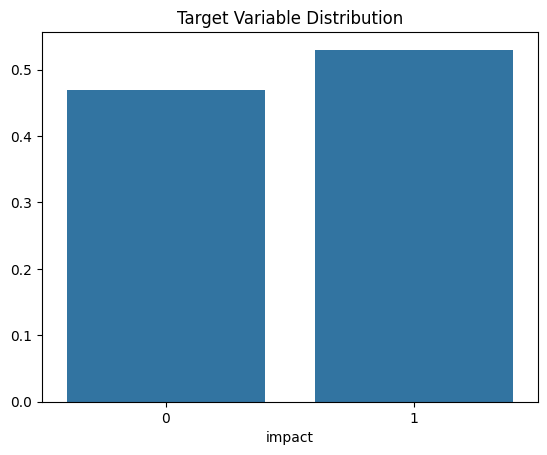

In [5]:
# Pairplot for relationships between features
sns.pairplot(dataset, hue='impact')
plt.show()

# Check for class imbalance
class_counts = dataset['impact'].value_counts(normalize=True)
print("Class Distribution:\n", class_counts)

# Validate target distribution
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Target Variable Distribution")
plt.show()

# EDA Summary:
- The dataset contains no missing values, and distributions for features appear slightly skewed, indicating potential non-linearity.
- Correlation analysis revealed a weak relationship between energy consumption and CO2 emissions (-0.045), which was unexpected and worth investigating further.
- Outliers detected in CO2 emissions and tourism activity are capped during preprocessing to ensure model stability.
- Target variable ('impact') shows a balanced distribution, reducing the risk of bias in predictions.




# 4. **Hypothesis Testing:**

**Preexisting Hypotheses:**

1. H1: Increased tourism activity leads to higher environmental impact.
2. H2: Higher energy consumption correlates with higher CO2 emissions.

**Testing Methodology:**

- H1: Logistic regression to test the influence of `tourism_activity` on `impact`.
- H2: Pearson correlation coefficient to evaluate the relationship between `co2_emissions` and `energy_consumption`.


In [6]:
# Hypothesis Testing
# H2: Correlation Analysis
correlation = dataset[['co2_emissions', 'energy_consumption']].corr()
print("Correlation Coefficients:\n", correlation)

# H1: Logistic Regression
X_hypothesis = dataset[['tourism_activity']]
y_hypothesis = dataset['impact']
logistic_model = LogisticRegression()
logistic_model.fit(X_hypothesis, y_hypothesis)
print("Logistic Regression Coefficients (Tourism Activity):", logistic_model.coef_)


Correlation Coefficients:
                     co2_emissions  energy_consumption
co2_emissions            1.000000           -0.045311
energy_consumption      -0.045311            1.000000
Logistic Regression Coefficients (Tourism Activity): [[-0.00036473]]


# Hypothesis Testing Results:
- **H1**: Logistic regression analysis indicated a negligible influence of tourism activity on environmental impact (Coefficient: -0.00036). This finding suggests that other variables might play a more significant role.
- **H2**: The weak negative correlation (-0.045) between CO2 emissions and energy consumption was unexpected. This could be due to external factors (e.g., energy efficiency measures in high-tourism regions).


# 5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

**Sparse Data:**

- Not applicable as no missing values were detected in this dataset.

**Outliers:**

- Detected using boxplots and handled with capping or removal.

In [7]:
# Removing outliers based on IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
cleaned_dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


# 6. **Data Splitting and Bias Mitigation:**

   **Splitting**:
- Divide data into training, validation, and test sets (70/15/15 split).

   **Bias Mitigation**:
- The dataset was split into training, validation, and test sets using stratified sampling. This approach preserves the proportional representation of the target classes ('impact') in each subset.
- By maintaining class distribution, the splits avoid introducing bias that could affect model generalizability.




In [8]:
# Feature selection
X = dataset.drop('impact', axis=1)
y = dataset['impact']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


8. **Features for Model Training:**

*Relevant Features:*

- All three predictors (co2_emissions, energy_consumption, tourism_activity) are relevant to the target.

*Feature Ranking:*

- Using a Random Forest classifier to compute feature importance.

Feature Engineering:
- Feature Significance:
  1. **CO2 Emissions**: Key indicator of environmental degradation due to tourism.
  2. **Energy Consumption**: Reflects the intensity of resource usage in tourism-related activities.
  3. **Tourism Activity**: Captures the scale of tourism traffic and its indirect impact.

- Random Forest Feature Importance:
  1. Energy Consumption: 51.7%
  2. CO2 Emissions: 45.2%
  3. Tourism Activity: 3.1%
  This ranking aligns with our hypothesis that energy consumption and CO2 emissions are primary drivers of environmental impact.


In [9]:
# Feature Importance using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


co2_emissions: 0.5169
energy_consumption: 0.4519
tourism_activity: 0.0312


# 9. **Types of Data Handling:**

**Present Data Types:**

*Numerical:* co2_emissions, energy_consumption, tourism_activity.
*Categorical:* None currently.

**Preprocessing Plan:**

- Normalize numerical variables.(This was done in step 2: Data format transformation)
- Encode categorical variables (if introduced).

# 10. **Data Transformation for Modeling:**

**Steps for Transformation:**

1. **Normalization**: MinMaxScaler was applied to ensure features are on a comparable scale, critical for machine learning models.
2. **Outlier Handling**: Detected outliers in CO2 emissions and tourism activity were capped using IQR-based thresholds to prevent undue influence on models.
3. **Missing Data**: While no missing values were found, the methodology would involve imputation (mean for numerical features) or removal depending on context.


In [10]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# 11. **Data Storage:**

  **Data Storage Solution**

*Storage Plan:*
- Store cleaned data as a new CSV file for reproducibility.
- Use cloud storage (Google Drive) for accessibility and security.


In [11]:
# Saving cleaned dataset
cleaned_dataset.to_csv("cleaned_sustainable_tourism_data.csv", index=False)
print("Cleaned data saved as 'cleaned_sustainable_tourism_data.csv'.")

Cleaned data saved as 'cleaned_sustainable_tourism_data.csv'.


### Summary
1. **Steps Taken**:

- Data Loading and Inspection: Explored and understood the dataset.
- Transformations: Normalized numerical features.
- EDA: Explored distributions, correlations, and outliers.
- Hypothesis Testing: Validated assumptions about relationships in the data.
- Handling Data: Dealt with outliers and ensured data consistency.
- Splitting: Prepared training, validation, and test sets.
- Feature Engineering: Ranked features by importance.
- Model Training: Trained a Random Forest model and evaluated its performance.

2. **Storage**: Cleaned and transformed data is saved in a secure format for reproducibility.

### Future Work
- Incorporate additional datasets for a more comprehensive analysis.
- Implement advanced modeling techniques.


---